1.1.1 - Рассмотрим программу обучения персептрона на языке Python. Сначала рассмотрим основной класс персептрона, который умеет учиться по тестовым данным.

In [3]:
# класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self, N):
        # создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append( 0)
    
    # метод для вычисления значения персептрона
    def calc(self, x):
        res =  0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    
    # пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) >  0:
            return 1
        else:
            return -1
        
    # обучение на одном примере
    def learn(self, la, x, y):
        # обучаем только, когда результат неверный
        if y * self.calc(x) <=  0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]

    # обучение по всем данным Т - кортеж примеров
    def learning(self, la, T):
        # цикл обучения
        for n in range(100):
            # обучение по всему набору примеров
            for t in T:
                self.learn(la, t[ 0], t[1])

# Содзаем класс двумерного персептрона
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# создаем примеры
T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[2, 7], -1])
perceptron.learning(la, T) # обучение персептрона
print(perceptron.w) # печатаем веса
# проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))

[0.1, -0.1]
-1
1
1
-1


Видим, что что наш персептрон отлично научился распознавать образы, относя к классу 1 те вектора, у которых первая компонента больше второй, и к классу -1 в противном случае. Хотя устройство персептронов довольно простое, эти конструкции могут решать и практические задачи. Кроме того, из таких персептронов состоят нейронные сети.

1.1.2 - видимо пишем код нейрона

In [4]:
import numpy as np

def sigmoid(x):
    # Функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # c = 4
n = Neuron(weights, bias)
x = np.array([2, 3])
print(n.feedforward(x))

0.9990889488055994


In [5]:
import numpy as np

class OurNeuralNetwork:
    '''
    Данные нейросети:
        - два входа
        - два нейрона в скрытых слоях (h1, h2)
        - выход (о1)
    Нейроны имеют идентичные веса и пороги:
        - w = [0, 1]
        - b = 0
    '''
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из предыдущего раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Входы для о1 - это выходы h1 и h2
        out_o1 = self.h1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
    
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))


0.7216325609518421


In [7]:
# Класс нейронной сети
class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], 4)
        self.weights2 = np.random.rand(4, 1)
        self.y = y
        self.output = np.zeros(y.shape)
    
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    
    def sigmoid_derivative(self):
        s = sigmoid(self.output)
        ds = s*(1-s)
        return ds

    def backprop(self):
        # применение правила цепи для нахождения производной функции потерь по весу1 и весу2
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T, (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        # обновление веса производной (наклона) функции потерь
        self.weights1 += d_weights1
        self.weights2 += d_weights2



SyntaxError: invalid syntax (246048104.py, line 14)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

from sklearn.datasets import load_digits

digits = load_digits()
X_digits, Y_digits = digits.data, digits.target
print('Dataset Sizes: ', X_digits.shape, Y_digits.shape)

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
import seaborn as sns
boston = pd.read_csv('boston_house_prices.csv')
boston.shape
boston.head()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    # pandas-table -> iloc
    boston.iloc[:, :-1],
    boston.iloc[:, -1],
    test_size = 0.20
)

print


,506,13,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
30,1.00245,0,8.14,0,0.538,6.674,87.3,4.239,4,307,21,380.23,11.98
206,0.13642,0,10.59,0,0.489,5.891,22.3,3.9454,4,277,18.6,396.9,10.87
58,0.01432,100,1.32,0,0.411,6.816,40.5,8.3248,5,256,15.1,392.9,3.95
423,12.0482,0,18.1,0,0.614,5.648,87.6,1.9512,24,666,20.2,291.55,14.1
251,0.1403,22,5.86,0,0.431,6.487,13,7.3967,7,330,19.1,396.28,5.9


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_digits, Y_digits, train_size=0.8, test_size=0.2, stratify=Y_digits, random_state=123)
print('Train/Test Sizes: ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sizes:  (1437, 64) (360, 64) (1437,) (360,)


In [12]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5, 
              random_state=123, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Y_preds = mlp_classifier.predict(X_test)
print(Y_preds[:15])
print(Y_test[:15])
## Метод Score для оценки точности моделей классификации
print('Test Accuracy: %.3f'%mlp_classifier.score(X_test, Y_test))
print('Training Accuracy: %.3f'%mlp_classifier.score(X_train, Y_train))

[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
[5 9 9 6 1 6 6 9 8 7 4 2 1 4 3]
Test Accuracy: 0.983
Training Accuracy: 1.000


Cоздадим метод plot_confusion_matrix(), который принимает исходные и предсказанные метки данных по модели. Затем он строит матрицу путаницы, используя matplotlib.

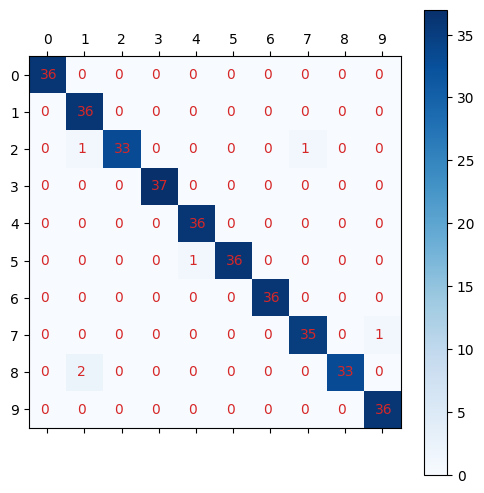

In [13]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    #print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(10), range(10))
    plt.xticks(range(10), range(10))
    plt.colorbar();
    for i in range(10):
        for j in range(10):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

plot_confusion_matrix(Y_test, mlp_classifier.predict(X_test))

In [14]:
print("Loss: ", mlp_classifier.loss_)
print("Number of Coefs: ", len(mlp_classifier.coefs_))
print("Number of Interceptc: ", len(mlp_classifier.intercepts_))
print("Number of Iterations for Which Estimator Ran: ", mlp_classifier.n_iter_)
print("Name of Output Layer Activation Function: ", mlp_classifier.out_activation_)

Loss:  0.003472868499418059
Number of Coefs:  2
Number of Interceptc:  2
Number of Iterations for Which Estimator Ran:  125
Name of Output Layer Activation Function:  softmax


### MLPRegressor

это класс, доступный как часть библиотеки neuro_network sklearn для выполнения задач регрессии с использованием многослойного персептрона. Также разделим набор данных на две части:
	данные обучения (80%), которые будут использоваться для модели обучения;
	тестовые данные (20%), по которым будет проверяться точность обученной модели.


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_boston)